In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [61]:
from Model import Model
from disba import depthplot

In [3]:
prem = Model("/usr/local/TauP-2.1.1/StdModels/prem.nd")
iasp = Model("/usr/local/TauP-2.1.1/StdModels/iasp91.tvel")
ak   = Model("/usr/local/TauP-2.1.1/StdModels/ak135.tvel")

In [16]:
label = {
    'vp' : 'Vp',
    'vs' : 'Vs',
    'rho': r'$\rho$'
}

Text(0.5, 1.0, 'Model Comparison')

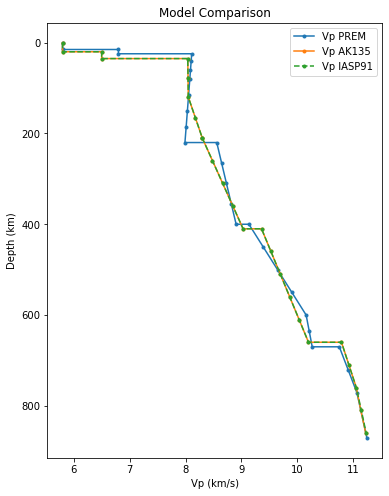

In [62]:
fig, ax = plt.subplots(1,1, figsize = (6,8))

MM = 900
for V in ['vp']:
    v = prem.get(V)
    z = prem.get('z')
    ff = (z<MM)
    ax.plot(v[ff], z[ff], '.-', label = label[V]  + " PREM", )

    v = ak.get(V)
    z = ak.get('z')
    ff = (z<MM)
    ax.plot(v[ff], z[ff], '.-', label = label[V] + " AK135", )

    v = iasp.get(V)
    z = iasp.get('z')
    ff = (z<MM)
    ax.plot(v[ff], z[ff], '.--', label = label[V] + " IASP91", )

ax.invert_yaxis()
plt.legend()
plt.ylabel("Depth (km)")
plt.xlabel("Vp (km/s)")
plt.title("Model Comparison")

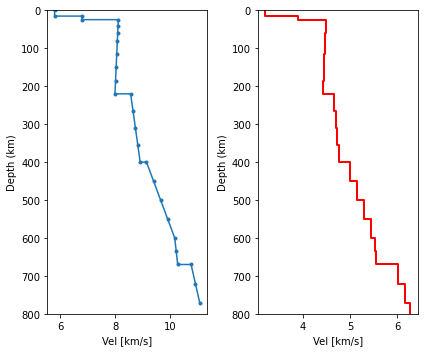

In [75]:
model, NAME = (prem, "PREM")

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (6,5))

for V in ['vp']:
    v = model.get(V)
    z = model.get('z')
    ff = (z < 800)
    ax1.plot(v[ff], z[ff], '.-')
    
    depthplot(*model.thick_get('vs', max_depth=800),
                  plot_args = { 'label' : 'Vs', 'ls' :'-', 'color' : 'red' },
                  ax = ax2)
    
ax1.set_ylim((0,800))
ax2.set_ylim((800, 0))
ax1.invert_yaxis()
#plt.legend()
ax1.set_ylabel("Depth (km)")
ax2.set_ylabel("Depth (km)")
ax1.set_xlabel("Vel [km/s]")
ax2.set_xlabel("Vel [km/s]")

plt.tight_layout()

In [3]:
_,_,f_per,_,f_C,f_U,_,_,_ = np.loadtxt("prem-R.asc", skiprows = 1, unpack = True)
_,_,fo_per,_,fo_C,fo_U,_,_,_ = np.loadtxt("prem-ocean-R.asc", skiprows = 1, unpack = True)

#_,_,f_per,_,f_C,f_U,_,_ = np.loadtxt("prem-L.asc", skiprows = 1, unpack = True)
#_,_,fo_per,_,fo_C,fo_U,_,_ = np.loadtxt("prem-ocean-L.asc", skiprows = 1, unpack = True)